# Introduction to Tensors

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [2]:
# Create Tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [3]:
# Check the number of dimensions of a tensor
scalar.ndim

0

In [4]:
# Create a vector
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [5]:
# Check the dimensions of the vector
vector.ndim

1

In [6]:
# Create a matrix
matrix = tf.constant([[10, 7],
                     [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [7]:
matrix.ndim

2

In [8]:
# Create another matrix
another_matrix = tf.constant([[10., 7.],
                              [3., 2.],
                              [8., 9.]], dtype=tf.float16)
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [9]:
another_matrix.ndim

2

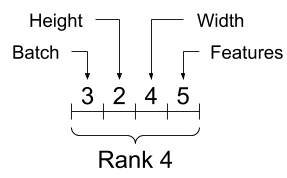

- **another_matrix dimension**
    - Batch: 3 (3 vectors)
    - Height: 2

In [10]:
# Create a tensor
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [11]:
tensor.ndim

3

- **tensor dimension**
    - Batch: 3 (3 matrix)
    - Height: 2
    - Width: 3

- Scalar: single number
- Vector: a number with direction (wind speed and direction
- Matrix: a 2-dimensional array of numbers
- Tensor: an n-dimension array of numbers (when n can be any number, a 0-dimensional tensor ia a scalar, a 1-dimensional tensor is a vector)

## Creating Tensors with tf.Variable()

In [12]:
# Create the same tensor with tf.Variable()
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [13]:
# Changing one of the elements in the changeable tensor
#changeable_tensor[0] = 7 # ERROR

In [14]:
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

## Creating Random Tensors

In [15]:
# Create two random (but the same) tensor
random_1 = tf.random.Generator.from_seed(42)
random_1 = random_1.normal(shape=(3, 2))
random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

In [16]:
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3, 2))
random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

### Shuffle the Order of Elements in a Tensor
- Useful when trying to learn which food is presented, if the first 1000 images are from one food, the weights will be adjusted only for that food, before starting to see the second food

In [17]:
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])
not_shuffled.ndim

2

In [18]:
not_shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [19]:
# Shuffle the non_shuffled tensor
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [20]:
tf.random.set_seed(1234)
print(tf.random.uniform([1]))  # generates 'A1'
print(tf.random.uniform([1]))  # generates 'A2'
print(tf.random.uniform([1]))  # generates 'A3'
print(tf.random.uniform([1]))  # generates 'A4'

tf.Tensor([0.5380393], shape=(1,), dtype=float32)
tf.Tensor([0.3253647], shape=(1,), dtype=float32)
tf.Tensor([0.59750986], shape=(1,), dtype=float32)
tf.Tensor([0.9099175], shape=(1,), dtype=float32)


In [21]:
tf.random.set_seed(1234)
print(tf.random.uniform([1]))  # generates 'A1'
print(tf.random.uniform([1]))  # generates 'A2'
print(tf.random.uniform([1]))  # generates 'A3'
print(tf.random.uniform([1]))  # generates 'A4'

tf.Tensor([0.5380393], shape=(1,), dtype=float32)
tf.Tensor([0.3253647], shape=(1,), dtype=float32)
tf.Tensor([0.59750986], shape=(1,), dtype=float32)
tf.Tensor([0.9099175], shape=(1,), dtype=float32)


In [22]:
@tf.function
def foo():
  a = tf.random.uniform([1], seed=1)
  b = tf.random.uniform([1], seed=1)
  return a, b
print(foo())  # prints '(A1, A1)'
print(foo())  # prints '(A2, A2)'

@tf.function
def bar():
  a = tf.random.uniform([1])
  b = tf.random.uniform([1])
  return a, b
print(bar())  # prints '(A1, A2)'
print(bar())  # prints '(A3, A4)'

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.1689806], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.1689806], dtype=float32)>)
(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.7539084], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.7539084], dtype=float32)>)
(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.13047123], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.1689806], dtype=float32)>)
(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.6087816], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.7539084], dtype=float32)>)


### Other Ways to Make Tensors

In [23]:
# Create a tensor of all ones
tf.ones([10, 7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [24]:
# Create a tensor of all zeros
tf.zeros(shape=(3, 4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Turning NumPy arrays into Tensors

In [25]:
import numpy as np

- X = tf.constant(some_matrix)
    - capital for matrix or tensor
- y = tf.constant(vector)
    - non-capital for vector

In [26]:
# Create a numpy array between 1 and 25
numpy_A = np.arange(1, 25, dtype=np.int32)
numpy_A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [27]:
A = tf.constant(numpy_A)
A

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

- 2 * 3 * 4 = 24 
- 3 * 8 = 24
- To readjust the shape of a tensor, the number must add up to the same number in the original tensor

In [28]:
B = tf.constant(numpy_A, shape=(2, 3, 4))
B

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]], dtype=int32)>

## Getting Information from Tensors

In [29]:
# Create a rank 4 (4D) tensor
rank_4_tensor = tf.zeros(shape=[2, 3, 4, 5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

👀 **TIP:** Inside 2 batches, there are 3 matrices, inside 3 matrices, there are 4 vectors and inside 4 vectors, there are 5 columns

In [30]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [31]:
# Get various attributes of the tensor
print('Datatype of every element: ', rank_4_tensor.dtype)
print('Shape: ', rank_4_tensor.shape)
print('Dimensions: ', rank_4_tensor.ndim)
print('Size: ', tf.size(rank_4_tensor))
print('Elements along the 0 axis: ', rank_4_tensor.shape[0])
print('Elements along the last axis: ', rank_4_tensor.shape[-1])
print('Total number of elements in the tensor: ', tf.size(rank_4_tensor).numpy())

Datatype of every element:  <dtype: 'float32'>
Shape:  (2, 3, 4, 5)
Dimensions:  4
Size:  tf.Tensor(120, shape=(), dtype=int32)
Elements along the 0 axis:  2
Elements along the last axis:  5
Total number of elements in the tensor:  120


## Indexing Tensors

In [32]:
# Remeber
some_list = [1, 2, 3, 4]
some_list[:2]

[1, 2]

In [33]:
# Get the first 2 elements of each dimension
rank_4_tensor[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [34]:
# Get the first element from each dimension from each index except for 
# the final one
rank_4_tensor[:1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [35]:
# Create a rank 2 (2D) tensor
rank_2_tensor = tf.constant([[10, 7],
                             [3, 4]])
rank_2_tensor.shape, rank_2_tensor.ndim

(TensorShape([2, 2]), 2)

In [36]:
# Get the last item of each of row of the rank_2 tensor
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

### Add Dimension

In [37]:
# Add in extra dimension to the rank 2 tensor
rank_3_tensor = rank_2_tensor[..., tf.newaxis]
rank_3_tensor, rank_2_tensor

(<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
 array([[[10],
         [ 7]],
 
        [[ 3],
         [ 4]]], dtype=int32)>, <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]], dtype=int32)>)

In [38]:
# ALternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis=-1) # Expand the final axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [39]:
tf.expand_dims(rank_2_tensor, axis=0)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]], dtype=int32)>

## Manipulating Tensors (Tensor Operations)

### Basic Operations

In [40]:
# Adding values to a tensor
tensor = tf.constant([[10, 7],
                      [3, 4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [41]:
# Multiplying a tensor
print(tensor * 10)
print(tf.multiply(tensor, 10)) # tf.math is FASTER

tf.Tensor(
[[100  70]
 [ 30  40]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[100  70]
 [ 30  40]], shape=(2, 2), dtype=int32)


In [42]:
# Substracting a tensor
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

### Matrix Multiplication
- The inner dimensions must match
- The resulting matrix has the shape of the outer dimensions

<br>

$\begin{bmatrix}
A & B & C\\
D & E & F\\
G & H & I
\end{bmatrix}
X
\begin{bmatrix}
J & K\\
L & M\\
N & O
\end{bmatrix}$

<br>

3x**3** & **3**x2 (matching inner dimensions)

**Result:** 3x2

In [43]:
tf.matmul(tensor, tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [46]:
X = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [47]:
X, tf.transpose(X), tf.reshape(X, shape=(2, 3))

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

- When performing matrix multiplication, if one of the axes doesn't line up, it's better to transpose than to reshape it

### Changing the Datatype of a Tensor

In [53]:
# Creating a tensor with default datatype (int32 or float32)
B = tf.constant([1.7, 7.4])
B.dtype

tf.float32

In [54]:
C = tf.constant([7, 10])
C.dtype

tf.int32

In [55]:
# Change to float32 to float16 (reduced precision)
D = tf.cast(B, dtype=tf.float16)
D

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>

In [56]:
# Change from int32 to float32
E = tf.cast(C, dtype=tf.float32)
E.dtype, C.dtype

(tf.float32, tf.int32)

### Aggregating Tensors

In [57]:
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [58]:
# Getting the absolute values
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

In [59]:
# Creating a random tensor with values between 0 and 100 of size 50
E = tf.constant(np.random.randint(0, 100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([12, 58, 99, 12, 26, 60, 65, 27, 64, 42, 93, 61, 45, 79,  9, 30, 38,
       36, 86, 70, 37, 91, 26, 78, 77, 21, 98, 74, 52, 55,  0, 40, 71, 97,
       98, 44, 32, 79, 77, 33, 62, 28, 54, 59, 29,  7, 63, 36, 76, 86])>

In [61]:
print('Size: ', tf.size(E))
print('Shape: ', E.shape) 
print('Dimensions: ', E.ndim)

Size:  tf.Tensor(50, shape=(), dtype=int32)
Shape:  (50,)
Dimensions:  1


In [62]:
# Finding teh minimum
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [63]:
# Finding the maximum
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=99>

In [64]:
# Finding the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=53>

In [65]:
# Finding the sum
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2692>

In [68]:
# Finding the variance
import tensorflow_probability as tfp
tfp.stats.variance(E)

<tf.Tensor: shape=(), dtype=int64, numpy=722>

In [69]:
# Finding the standard deviation
tf.math.reduce_std(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=26.859905>

### Find the Positional Minimum and Maximum

In [70]:
# Create a tensor for finding positional min and max
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [71]:
# Finding the positional maximum
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [72]:
# Index on the largest value position
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [73]:
# Finding the maximim value of F
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [74]:
# Finding the positional minimum
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [75]:
# Index on the lowest value position
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

## Squeezing a Tensor (Removing all single dimensions)

In [76]:
# Create a tensor
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape=[1, 1, 1, 1, 50])
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [77]:
G.ndim

5

In [78]:
G_squeezed = tf.squeeze(G)
G_squeezed, G_squeezed.shape, G_squeezed.ndim

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
        0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
        0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
        0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
        0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
        0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
        0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
        0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
        0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
        0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
       dtype=float32)>, TensorShape([50]), 1)

## One-hot Encoding Tensor

In [79]:
# Create a list of indices
some_list = [0, 1, 2, 3] # Could be red, green, blue, purple

# One-hot encode the list of indices
tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [80]:
# Specifying custom values for one hot encoding
tf.one_hot(some_list, depth=4, on_value='On', off_value='Off')

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'On', b'Off', b'Off', b'Off'],
       [b'Off', b'On', b'Off', b'Off'],
       [b'Off', b'Off', b'On', b'Off'],
       [b'Off', b'Off', b'Off', b'On']], dtype=object)>

In [84]:
tf.one_hot(some_list, depth=3)

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]], dtype=float32)>

## More Math Functions

### Squaring, log, square root

In [85]:
H = tf.range(1, 10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [86]:
# Square
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [88]:
# Square Root
tf.sqrt(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [90]:
# Log
tf.math.log(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

## Tensors and NumPy

In [91]:
# Create a tensor directly from a NumPy array
J = tf.constant(np.array([3., 7., 10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [92]:
# Convert the tensor back to a NumPy array
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [93]:
# Convert tensor J to a NumPy array
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

In [97]:
J = tf.constant([3.])
J.numpy()[0]

tf.Tensor(3.0, shape=(), dtype=float32)


3.0

In [98]:
# The default types of each are slightly different
numpy_J = tf.constant(np.array([3., 7., 10.]))
tensor_J = tf.constant([3., 7., 10.])
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

## Finding Access to GPUs

In [99]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [100]:
# When GPU is active
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

